<a href="https://colab.research.google.com/github/Tarandeep97/bank_marketing_analysis/blob/master/Bank_Marketing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Bank marketing Analysis

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 
![alt text](https://brandspurng.com/wp-content/uploads/2018/07/customer-data.jpg)


## Step 1 : Install & import dependecies

In [63]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install seaborn
!pip install scipy

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

from scipy.stats import randint


### Load Dataset

In [0]:
dataset_url = "https://raw.githubusercontent.com/Tarandeep97/bank_marketing_analysis/master/bank-additional-full.csv"
bank_df = pd.read_csv(dataset_url,delimiter=';' )

### Feature Engineering

In [45]:
X = bank_df.drop(['y'], axis=1)
X_dummy = pd.get_dummies(X)
y = bank_df['y']
y[y=='no']=0
y[y=='yes']=1
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X_dummy,y,test_size=0.3,random_state=42)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


## Step 2 : Exploratory Data Analysis(EDA)

### 2.1 Quantitative EDA

In [27]:

X_dummy.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [28]:
X_dummy.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,...,0.017432,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,...,0.130877,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
X_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed

### 2.2 Graphical EDA

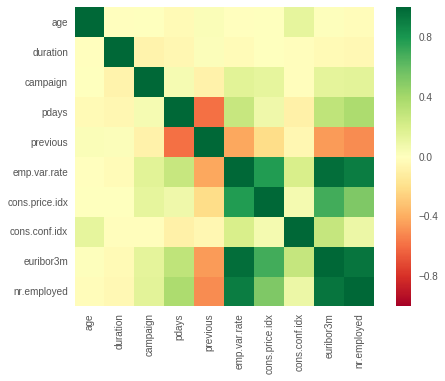

In [0]:
sns.heatmap(bank_df.corr(),square=True,cmap='RdYlGn')

Insights from above graph:

*   Attributes employment variation rate,  number of employees,  euribor 3 month rate, consumer price index are highly +vely coorelated, and
*   Other attributes show high -ve coorelation.

## Step 3: Evaluating Machine Learning Models

### KNeighborsClassifiers

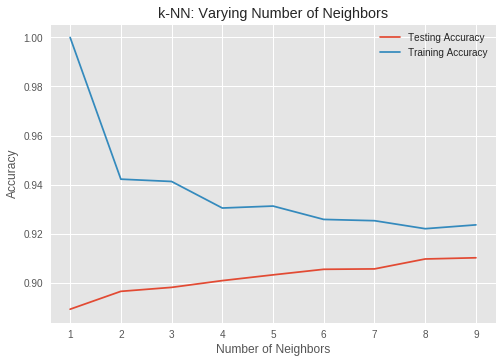

Max. Accuracy for KNN: 0.9101723719349356


In [47]:
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)

    
    knn.fit(X_train, y_train)
    
    
    train_accuracy[i] = knn.score(X_train, y_train)

   
    test_accuracy[i] = knn.score(X_test, y_test)


plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

print("Max. Accuracy for KNN:",max(test_accuracy))

Insights from graph: KNN with 3 neighbors performs well over data

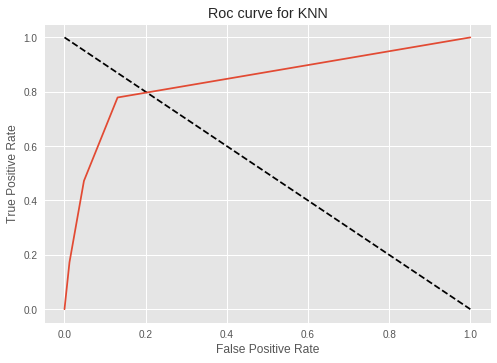

AUC for :0.8375244969461524


In [69]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve for KNN')
plt.show()

print('AUC for :{}'.format(roc_auc_score(y_test,y_pred_prob)))

### Logistic Regession Classifier

In [61]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

c_space = np.logspace(-5,8,10)
param_grid = {'C':c_space}
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

logreg_cv.fit(X_train,y_train)
y_pred = logreg_cv.predict(X_test)
print("Accuracy of Logistic Regression Classifier:",logreg_cv.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Accuracy of Logistic Regression Classifier: 0.9107388524722829


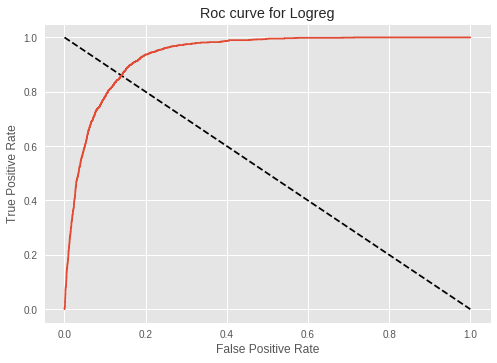

AUC for logreg:0.9341212659223588


In [70]:
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve for Logreg')
plt.show()


print('AUC for logreg:{}'.format(roc_auc_score(y_test,y_pred_prob)))


### DecisionTreeClassifier 

In [74]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
print(tree.score(X_test,y_test))

0.8866229667394999


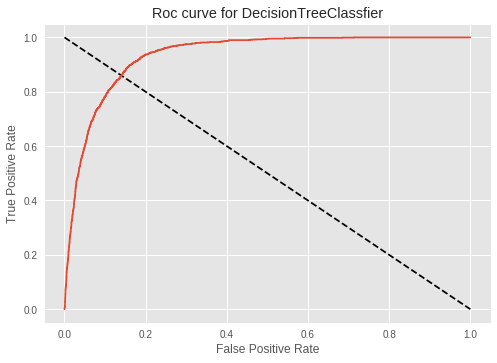

AUC for DecisionTreeClassfier:0.9341212659223588


In [75]:
_pred_prob = tree.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve for DecisionTreeClassfier')
plt.show()


print('AUC for DecisionTreeClassfier:{}'.format(roc_auc_score(y_test,y_pred_prob)))